In [81]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model, neighbors

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Discover and visualize the data

In [82]:
# Read file 
df = pd.read_csv("./data/train.csv")

# Print the shape of the dataframe
print(df.shape)

# Display the first 5 rows of data
df.head()

(21263, 82)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [83]:
# Check the variable types in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [84]:
# Print skewness of all the features 
print('Skewness of all the features: ')

# Get the first 10 columns 
skewness = df.skew().sort_values(ascending=False)

# Print skewness
print(skewness)

Skewness of all the features: 
wtd_range_FusionHeat         4.233614
wtd_range_Density            3.322726
wtd_std_FusionHeat           2.850134
std_FusionHeat               2.822555
wtd_mean_FusionHeat          2.763826
                               ...   
entropy_atomic_mass         -0.785245
wtd_entropy_atomic_radius   -0.789187
entropy_fie                 -0.792549
entropy_Density             -0.807427
entropy_ElectronAffinity    -0.912379
Length: 82, dtype: float64


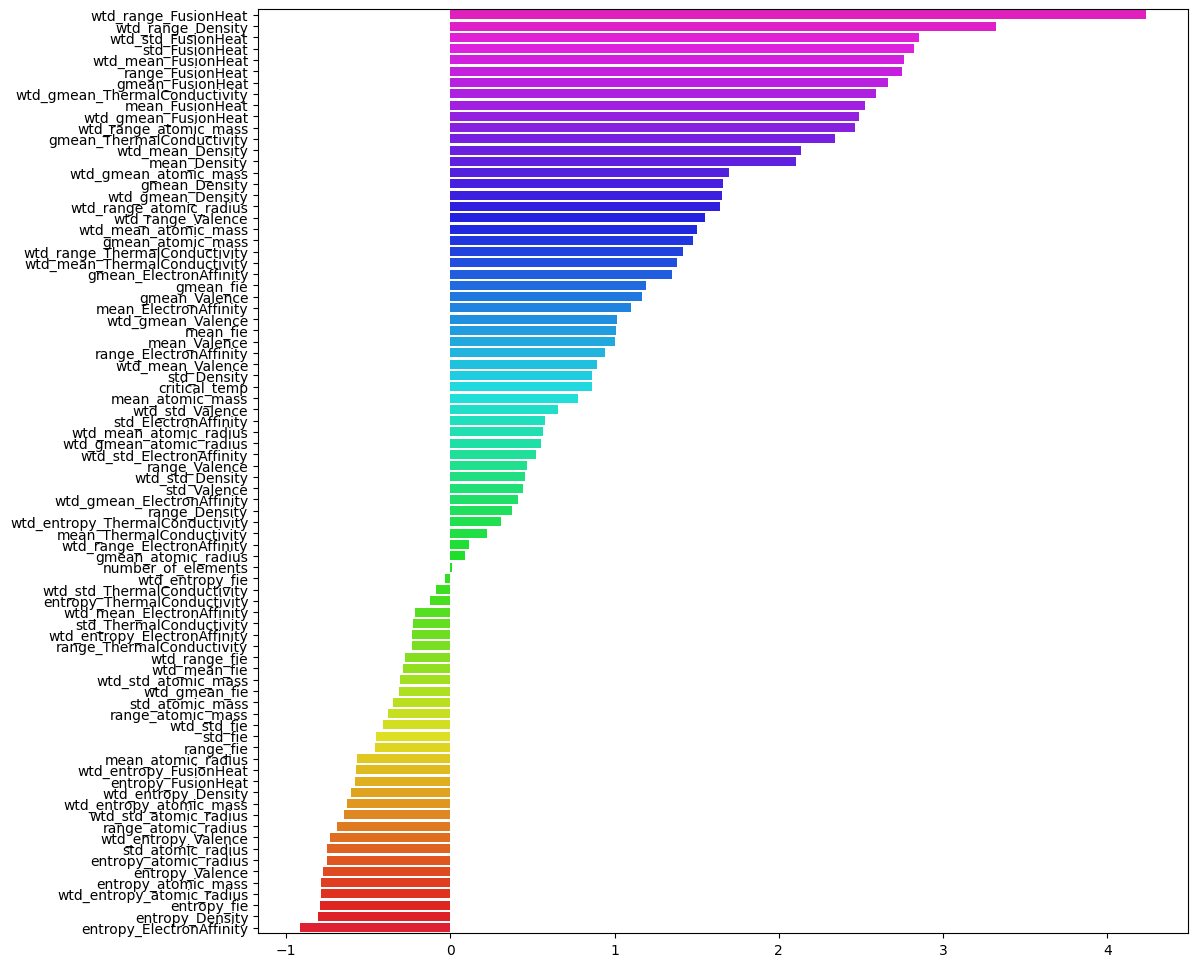

In [85]:
# Set up the figure size 
plt.figure(figsize=(12,12))

# Plot out the diagram to have a clear view of the skewness
sns.barplot(x=skewness, y=skewness.index, palette = 'gist_rainbow_r')

# Show the plot
plt.show()

### Findings:
(1) wtd_range_FusionHeat is the most right skewed attribute with a value of 4.233614

(2) entropy_ElectronAffinity is the most left skewed attribute with a value of -0.912379

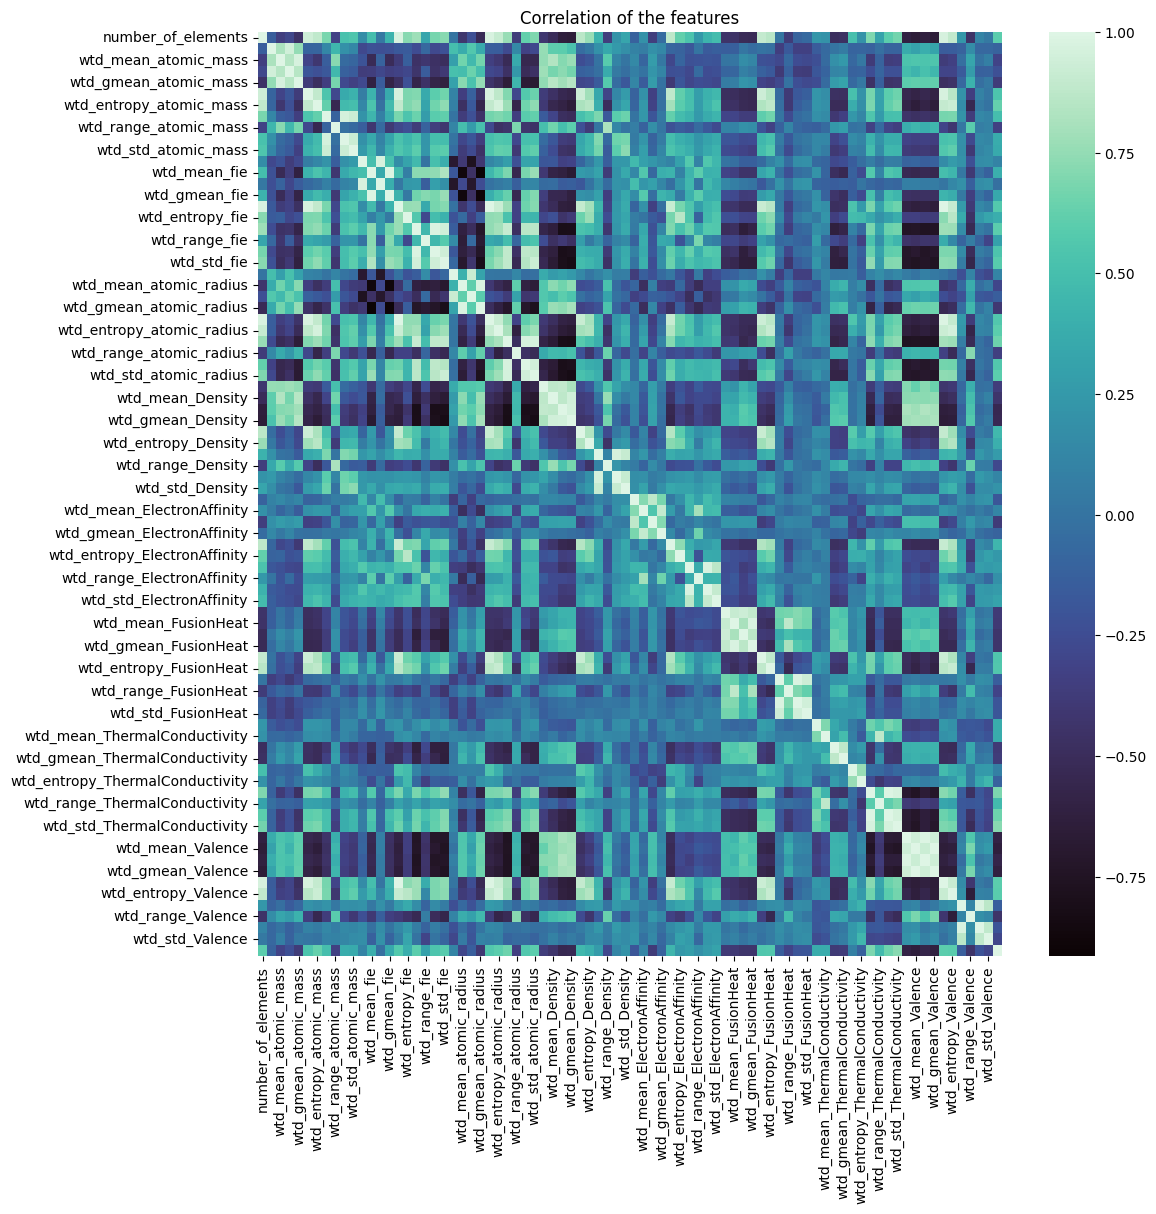

In [86]:
# Set the figure size
plt.figure(figsize=(12, 12))

# Using heapmap to plot
sns.heatmap(df.corr(), cmap="mako")

# Set the title of the plot
plt.title('Correlation of the features')

# Show the plot
plt.show()

In [87]:
# Returns the correlation coefficients for the target variable "critical_temp"
corr_matrix = df.corr()
corr_matrix = corr_matrix['critical_temp'].sort_values(ascending=False)
corr_matrix.head()

critical_temp                  1.000000
wtd_std_ThermalConductivity    0.721271
range_ThermalConductivity      0.687654
range_atomic_radius            0.653759
std_ThermalConductivity        0.653632
Name: critical_temp, dtype: float64

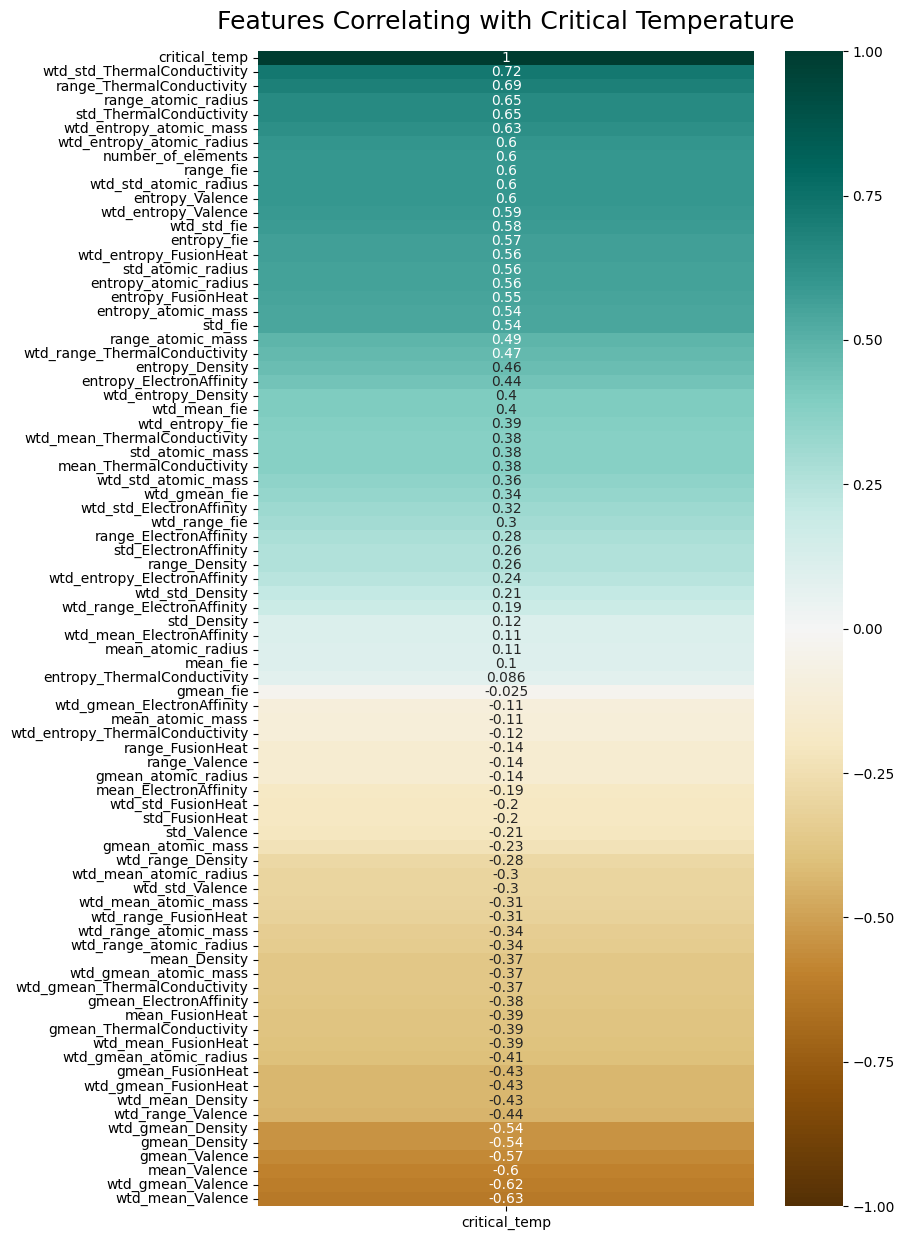

In [88]:
plt.figure(figsize=(8, 15))
heatmap = sns.heatmap(df.corr()[['critical_temp']].sort_values(by='critical_temp', ascending=False), yticklabels=1, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Critical Temperature', fontdict={'fontsize':18}, pad=16);

### Findings:
0.9 to 1 positive or negative indicates a very strong correlation. 
0.7 to 0.9 positive or negative indicates a strong correlation. 
0.5 to 0.7 positive or negative indicates a moderate or acceptable correlation. 
0.3 to 0.5 positive or negative indicates a weak correlation. 
0 to 0.3 positive or negative indicates a negligible correlation.

(1) The attribute with the most significant correlation with the target attribute, critical_temp is wtd_std_ThermalConductivity with a positive correlation p value of 0.72.

(2) The 2 attributes with the weakest correlation are entropy_ThermalConductivity and gmean_fie with -0.025 and 0.086 respectively.

(2) There are several attributes that have a weak correlation (0 to 0.3 positive or negative) but it would not affect the prediction models as there are sufficient attributes with a positive or negative correlation p value of 0.3 and higher.

## Prepare the data for machine learning algorithms

### Filtering to remove irrelevant features

In [89]:
# Number of columns in original dataframe
original_columns = len(df.columns)
original_columns

82

In [90]:
# Remove all columns that have a very small variance

# This gets rid of features which are the same value 95% of the time
threshold=0.05 
selector = VarianceThreshold(threshold=threshold).fit(df)
df = pd.DataFrame(selector.transform(df),columns=df.columns[selector.get_support()])
df.shape

(21263, 82)

In [91]:
# Check for multicollinearity

# Returns the correlation matrix of the dataframe
corr_matrix = df.corr()
mutually_corr_features = set()
for i in range(len(corr_matrix.columns)):  
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            if colname!='critical_temp':
                mutually_corr_features.add(colname)
print(len(mutually_corr_features))
df.drop(mutually_corr_features,axis=1,inplace=True)
df.shape


54


(21263, 28)

In [92]:
# This gets rid of features that have a absolute correlation with the target less than 0.3

correlation_threshhold = 0.3

corr = pd.DataFrame(df.corr()['critical_temp'])
corr['abs'] = np.abs(corr['critical_temp'])
corr = corr.sort_values(by='abs',ascending=False).drop('abs',axis=1).dropna().reset_index()
corr = corr.rename(columns={'index':'feature','critical_temp':'corr'}).loc[1:]

low_correlated_features = list(corr[np.abs(corr['corr'])<=correlation_threshhold]['feature'])
print(len(low_correlated_features))
df.drop(low_correlated_features,axis=1,inplace=True)
df.shape

12


(21263, 16)

In [93]:
print(str(original_columns-df.shape[1])+' features were found to be irrelevant')

66 features were found to be irrelevant


In [94]:
path = 'C:/Users/Aston/Documents/CSCI316/data/'
df.to_csv(path+'data_filtered.csv')

### Perform binning

In [96]:
df = pd.read_csv('./data/data_filtered.csv', index_col=[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21263 entries, 0 to 21262
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   number_of_elements            21263 non-null  float64
 1   range_atomic_mass             21263 non-null  float64
 2   wtd_range_atomic_mass         21263 non-null  float64
 3   wtd_mean_fie                  21263 non-null  float64
 4   wtd_entropy_fie               21263 non-null  float64
 5   range_fie                     21263 non-null  float64
 6   wtd_range_fie                 21263 non-null  float64
 7   wtd_range_atomic_radius       21263 non-null  float64
 8   mean_Density                  21263 non-null  float64
 9   mean_FusionHeat               21263 non-null  float64
 10  mean_ThermalConductivity      21263 non-null  float64
 11  wtd_mean_ThermalConductivity  21263 non-null  float64
 12  gmean_ThermalConductivity     21263 non-null  float64
 13  r

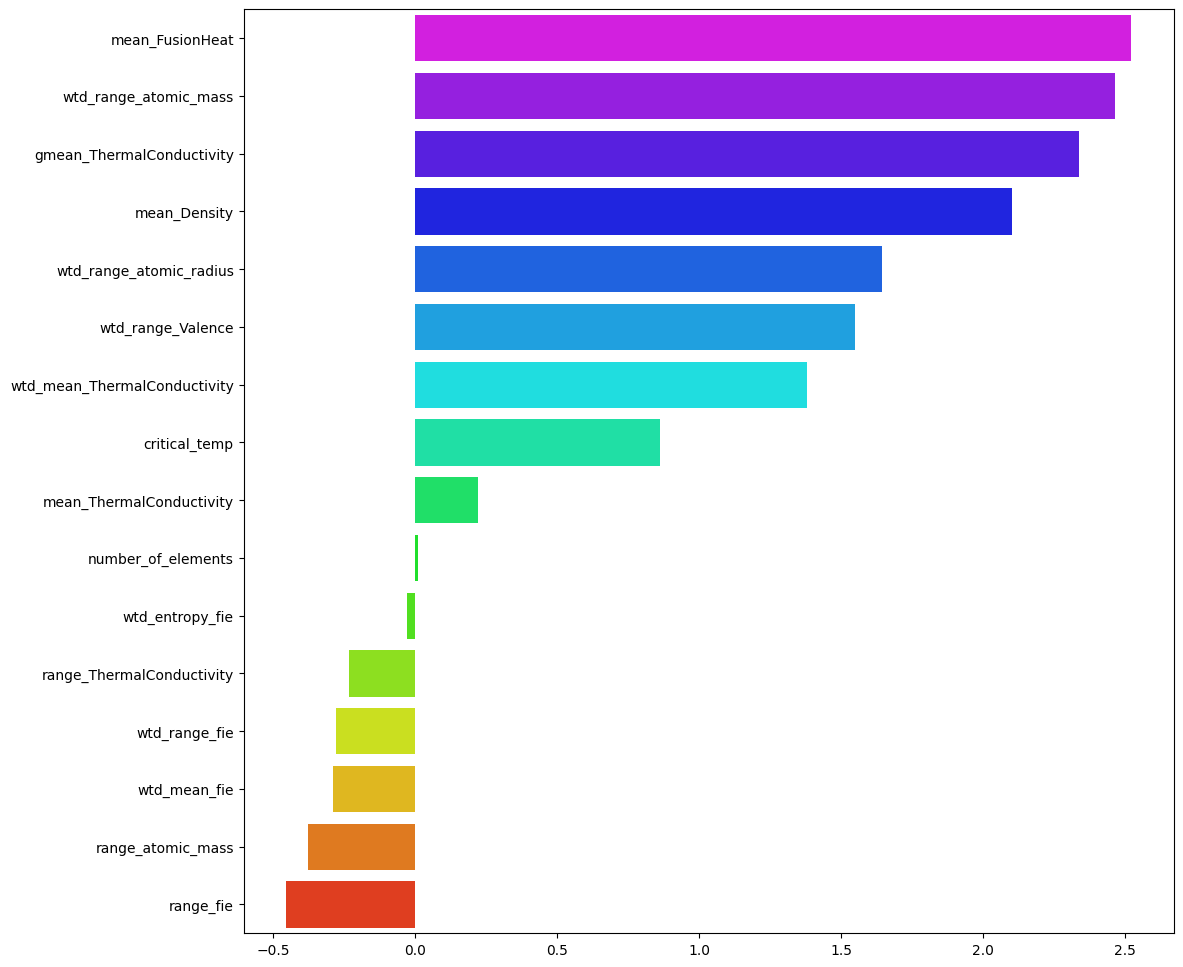

In [97]:
# Skewness of features in descending order
skewness = df.skew().sort_values(ascending=False)

# Set up the figure size 
plt.figure(figsize=(12,12))

# Plot out the diagram to have a clear view of the skewness
sns.barplot(x=skewness, y=skewness.index, palette = 'gist_rainbow_r')

# Show the plot
plt.show()

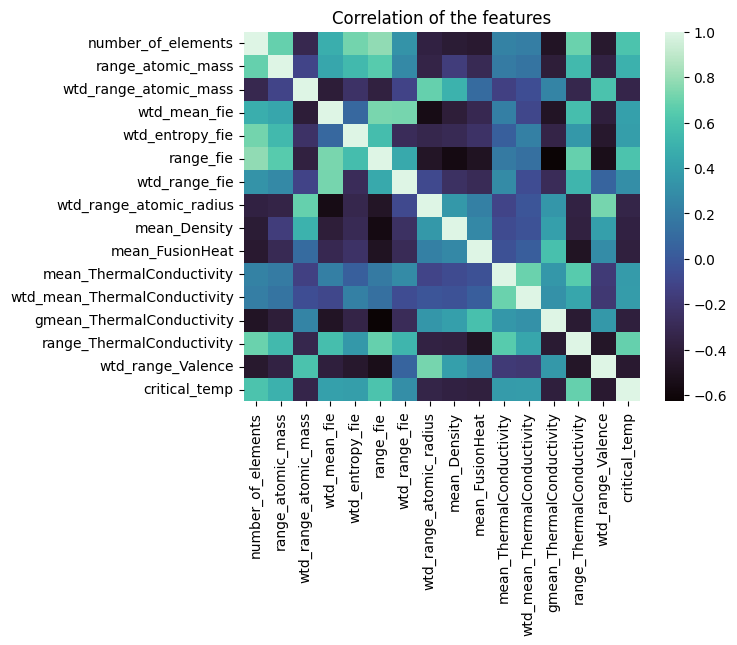

In [98]:
# Using heapmap to plot
sns.heatmap(df.corr(), cmap="mako")

# Set the title of the plot
plt.title('Correlation of the features')

# Show the plot
plt.show()

In [99]:
ct_value_counts = df['critical_temp'].value_counts(sort=True)

ct_df = pd.DataFrame(ct_value_counts)
ct_df = ct_df.reset_index()
ct_df.columns = ['critical_temp', 'count']
ct_df

,critical_temp,count
0,80.000,143
1,20.000,129
2,30.000,125
3,90.000,122
4,40.000,111
...,...,...
3002,6.170,1
3003,4.345,1
3004,20.460,1
3005,19.090,1


In [100]:
# Finding the optimal bin-width with Freedman–Diaconis rule
q75, q25 = np.percentile(df['critical_temp'], [75, 25])
iqr = q75 - q25
bin_width = (2 * iqr) / (len(ct_df)**(1/3))
print(round(bin_width))


8


In [101]:
# Creating the bins
bins = [0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 192]

# Binning critical_temp variable into appropriate bins
ct_binned = df.groupby(pd.cut(df['critical_temp'], bins=bins)).size().reset_index()
ct_binned.columns = ['critical_temp_range', 'count']
ct_binned

,critical_temp_range,count
0,"(0, 8]",6933
1,"(8, 16]",2734
2,"(16, 24]",1783
3,"(24, 32]",1459
4,"(32, 40]",1239
5,"(40, 48]",648
6,"(48, 56]",639
7,"(56, 64]",631
8,"(64, 72]",709
9,"(72, 80]",1082


In [102]:
# Bin labels
group_labels = ct_binned.index.tolist()

# Insert labelled binned critical_temp as a new column into the original dataframe 
df['critical_temp_range'] = pd.cut(df['critical_temp'], bins=bins, labels=group_labels)
df.head()

,number_of_elements,range_atomic_mass,wtd_range_atomic_mass,wtd_mean_fie,wtd_entropy_fie,range_fie,wtd_range_fie,wtd_range_atomic_radius,mean_Density,mean_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,range_ThermalConductivity,wtd_range_Valence,critical_temp,critical_temp_range
0,4.0,122.90607,31.794921,1010.268571,0.791488,810.6,735.985714,42.914286,4654.35725,6.9055,107.756645,61.015189,7.062488,399.97342,1.085714,29.0,3
1,5.0,122.90607,36.161939,1010.612857,0.807078,810.6,743.164286,50.571429,5821.48580,7.7844,172.205316,61.372331,16.064228,429.97342,1.128571,26.0,3
2,4.0,122.90607,35.741099,1010.820000,0.773620,810.6,743.164286,49.314286,4654.35725,6.9055,107.756645,60.943760,7.062488,399.97342,1.114286,19.0,2
3,4.0,122.90607,33.768010,1010.544286,0.783207,810.6,739.575000,46.114286,4654.35725,6.9055,107.756645,60.979474,7.062488,399.97342,1.100000,22.0,2
4,4.0,122.90607,27.848743,1009.717143,0.805230,810.6,728.807143,36.514286,4654.35725,6.9055,107.756645,61.086617,7.062488,399.97342,1.057143,23.0,2


### Stratified split for training and testing dataset

In [103]:
X = df.drop(['critical_temp', 'critical_temp_range'],axis=1)
y = df['critical_temp'].to_frame()
y_binned = df['critical_temp_range'].to_frame()

# Stratified Sampling where 2/3 of records for training and 1/3 for testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y_binned, 
                                                    test_size=0.33)

In [104]:
# Show shape training set of target variable, critical_temp
y_train.shape

(14246, 1)

In [105]:
# Show shape training set of the features
X_train.shape

(14246, 15)

In [106]:
# Show training set for critical_temp
y_test.shape

(7017, 1)

In [107]:
# Show training set for features
X_test.shape

(7017, 15)

## Select and train models

### Random Forest Regression

In [108]:
# Create Random Forest Regressor object
rfr = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model using the training set
rfr.fit(X_train, y_train['critical_temp'])

# Make predictions using the test set
rfr_y_pred = rfr.predict(X_test)


In [109]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfr_y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfr_y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, rfr_y_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, rfr_y_pred))

Mean Absolute Error:  5.788207554274265
Mean Squared Error:  104.98091604238586
Root Mean Squared Error:  10.246019521862422
Coefficient of determination: 0.91


### Linear Regression

In [110]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train['critical_temp'])

# Make predictions using the testing set
linearreg_y_pred = regr.predict(X_test)

In [111]:
print("Coefficients: \n", regr.coef_)
print('Mean Absolute Error: ', mean_absolute_error(y_test, linearreg_y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, linearreg_y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, linearreg_y_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, linearreg_y_pred))

Coefficients: 
 [ 4.95875356e+00  7.91031509e-02 -1.43332521e-01 -3.35845516e-02
 -1.54614028e+01  1.59143969e-02  1.11134650e-03  8.22875097e-03
 -3.82763763e-04 -2.79806037e-02  1.36509278e-01  1.79359887e-01
 -2.92007469e-01  2.34828726e-02 -1.58716034e+00]
Mean Absolute Error:  18.009708932844713
Mean Squared Error:  511.1616539966939
Root Mean Squared Error:  22.608884404072082
Coefficient of determination: 0.56


### k-Nearest Neighbors Regression

In [112]:
# Create k-nearest neighbors regression object
knn = neighbors.KNeighborsRegressor()

# Train the model using the training sets
knn.fit(X_train, y_train['critical_temp'])

# Make predictions using the testing set
knn_y_pred = knn.predict(X_test)

print('Mean Absolute Error: ', mean_absolute_error(y_test, knn_y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, knn_y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, knn_y_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, knn_y_pred))

Mean Absolute Error:  7.4625909632321505
Mean Squared Error:  162.55291035137986
Root Mean Squared Error:  12.749623929802002
Coefficient of determination: 0.86


## Fine-tune the models

### Random Forest Regression

In [113]:
sc = StandardScaler()
scale_X_train = sc.fit_transform(X_train)
scale_X_test = sc.transform(X_test)

# Train the model using the training sets
tuned_rfr_fit = rfr.fit(scale_X_train, y_train['critical_temp'])

# Make predictions using the testing set
tuned_rfr_y_pred = rfr.predict(scale_X_test)

In [114]:
print('Original Prediction Score:\n')
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfr_y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfr_y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, rfr_y_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, rfr_y_pred))

Original Prediction Score:

Mean Absolute Error:  5.788207554274265
Mean Squared Error:  104.98091604238586
Root Mean Squared Error:  10.246019521862422
Coefficient of determination: 0.91


In [115]:
print('After Fine-tuning Prediction Score:\n')
print('Mean Absolute Error: ', mean_absolute_error(y_test, tuned_rfr_y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, tuned_rfr_y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, tuned_rfr_y_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, tuned_rfr_y_pred))

After Fine-tuning Prediction Score:

Mean Absolute Error:  5.777832465620257
Mean Squared Error:  104.72628809216485
Root Mean Squared Error:  10.23358627716427
Coefficient of determination: 0.91


In [116]:
rfr_improv = (r2_score(y_test, tuned_rfr_y_pred) - r2_score(y_test, rfr_y_pred))
print("Improvement in accuracy: %.5f" % rfr_improv)

Improvement in accuracy: 0.00022


### Linear Regression

In [117]:
# Get parameters of LinearRegression()
regr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [118]:
# Find optimal parameters with grid search
regr_params = {
             'fit_intercept': [True, False],
             'n_jobs': [None, -1, 1],
             }
grid_regr = GridSearchCV(estimator=regr, param_grid = regr_params, cv = 2, n_jobs=-1)

# Fine-tuning results post grid search on LinearRegression()
grid_regr_score = grid_regr.fit(X_train, y_train['critical_temp'])

regr_improv = (grid_regr_score.best_score_ - r2_score(y_test, linearreg_y_pred))

print("\nThe best score (R2) across ALL searched params: %.5f\n" % grid_regr_score.best_score_)
print("The score for Linear Regression before tuning: %.5f\n" % r2_score(y_test, linearreg_y_pred))
print("Improvement: %.5f\n" % regr_improv)
print("The best parameters across ALL searched params:\n", grid_regr_score.best_params_)


The best score (R2) across ALL searched params: 0.56467

The score for Linear Regression before tuning: 0.56371

Improvement: 0.00096

The best parameters across ALL searched params:
 {'fit_intercept': True, 'n_jobs': None}


### k-Nearest Neighbors

In [119]:
# Calculating the accuracy of models with different values of k
acc_array = np.zeros(40)
for i in range(1,41):
    # Train Model and Predict  
    tune_knn = neighbors.KNeighborsRegressor(n_neighbors = i).fit(X_train,y_train)
    tune_knn_y_pred = tune_knn.predict(X_test)
    acc_array[i-1] = r2_score(y_test, tune_knn_y_pred)

acc_array

array([0.86067313, 0.87464848, 0.87178105, 0.86629654, 0.86125739,
       0.85581146, 0.85156384, 0.8478901 , 0.84417047, 0.84010827,
       0.83506233, 0.83071244, 0.82557499, 0.8210567 , 0.81751965,
       0.81355653, 0.80945491, 0.80568447, 0.8020142 , 0.79846309,
       0.7949535 , 0.79138526, 0.78827875, 0.78499264, 0.78194597,
       0.77952238, 0.77703187, 0.77459963, 0.77210729, 0.76955836,
       0.76707795, 0.76532921, 0.76417099, 0.76231184, 0.75986381,
       0.75796331, 0.75559947, 0.75356915, 0.75145005, 0.74998099])

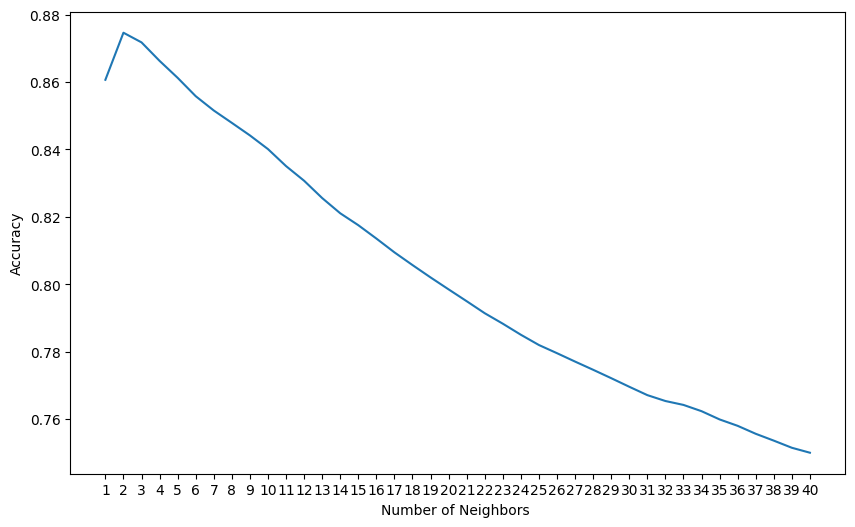

In [120]:
# Visualize the accuracy of models with increasing values of k
loc = np.arange(1,41,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,41), acc_array)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.savefig('knn_tuning.png')
plt.show()

In [121]:
# Get parameters of kNN regression 
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [122]:
knn_params = { 'n_neighbors' : [2,3,4],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

grid_knn = GridSearchCV(estimator=knn, param_grid=knn_params, verbose = 1, cv=3, n_jobs = -1)

In [123]:
grid_knn_score = grid_knn.fit(X_train, y_train)

print("\n The best score (R2) across ALL searched params:\n", grid_knn_score.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_knn_score.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits

 The best score (R2) across ALL searched params:
 0.8717682880012277

 The best parameters across ALL searched params:
 {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


In [124]:
post_tuned_knn = neighbors.KNeighborsRegressor(n_neighbors = 4, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
post_tuned_knn.fit(X_train, y_train)
tuned_knn_y_pred = post_tuned_knn.predict(X_test)

In [125]:
print('Original Prediction Score:\n')
print('Mean Absolute Error: ', mean_absolute_error(y_test, knn_y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, knn_y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, knn_y_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, knn_y_pred))

Original Prediction Score:

Mean Absolute Error:  7.4625909632321505
Mean Squared Error:  162.55291035137986
Root Mean Squared Error:  12.749623929802002
Coefficient of determination: 0.86


In [126]:
print('After Fine-tuning Prediction Score:\n')
print('Mean Absolute Error: ', mean_absolute_error(y_test, tuned_knn_y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, tuned_knn_y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, tuned_knn_y_pred)))
print("Coefficient of determination: %.2f" % r2_score(y_test, tuned_knn_y_pred))

After Fine-tuning Prediction Score:

Mean Absolute Error:  6.129057215067208
Mean Squared Error:  127.36209885989659
Root Mean Squared Error:  11.285481773495388
Coefficient of determination: 0.89


In [127]:
knn_improv = (r2_score(y_test, tuned_knn_y_pred) - r2_score(y_test, knn_y_pred))
print("Improvement in accuracy: %.5f" % knn_improv)

Improvement in accuracy: 0.03004
